In [2]:
import os, sys
sys.path.append('/home/vagrant/project')
sys.path.append('/vagrant')
os.environ['PROJ_LIB'] = '/home/vagrant/Miniconda3-4.6.14-Linux-x86_64/envs/py3openwind/share/proj'
os.environ['DJANGO_SETTINGS_MODULE'] = 'project.settings'

In [3]:
import django
django.setup()

from django.conf import settings

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from nansat.nansat import Nansat
from nansat.domain import Domain
from nansat.tools import haversine
from openwind import sar_wind
from geospaas_wind.utils import wind_from_sar_and_arome_forecast

In [7]:
fn = 'http://thredds.nersc.no/thredds/dodsC/sarvind/SarVind/WIND_S1B_IW_GRDM_1SDV_20190821T155906_20190821T155939_017686_021461_7D4D.nc'
fn = '/vagrant/WIND_S1B_IW_GRDM_1SDV_20190821T155906_20190821T155939_017686_021461_7D4D.nc'

In [8]:
n = Nansat(fn)

=>Near surface wind from Sentinel-1 GRD data<=


In [10]:
lon, lat = n.get_geolocation_grids()

In [11]:
u = n['U']

In [13]:
%matplotlib inline
import cartopy.feature as cfeature
from cartopy import config
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

Text(0.5, 1.05, 'Zonal wind speed')

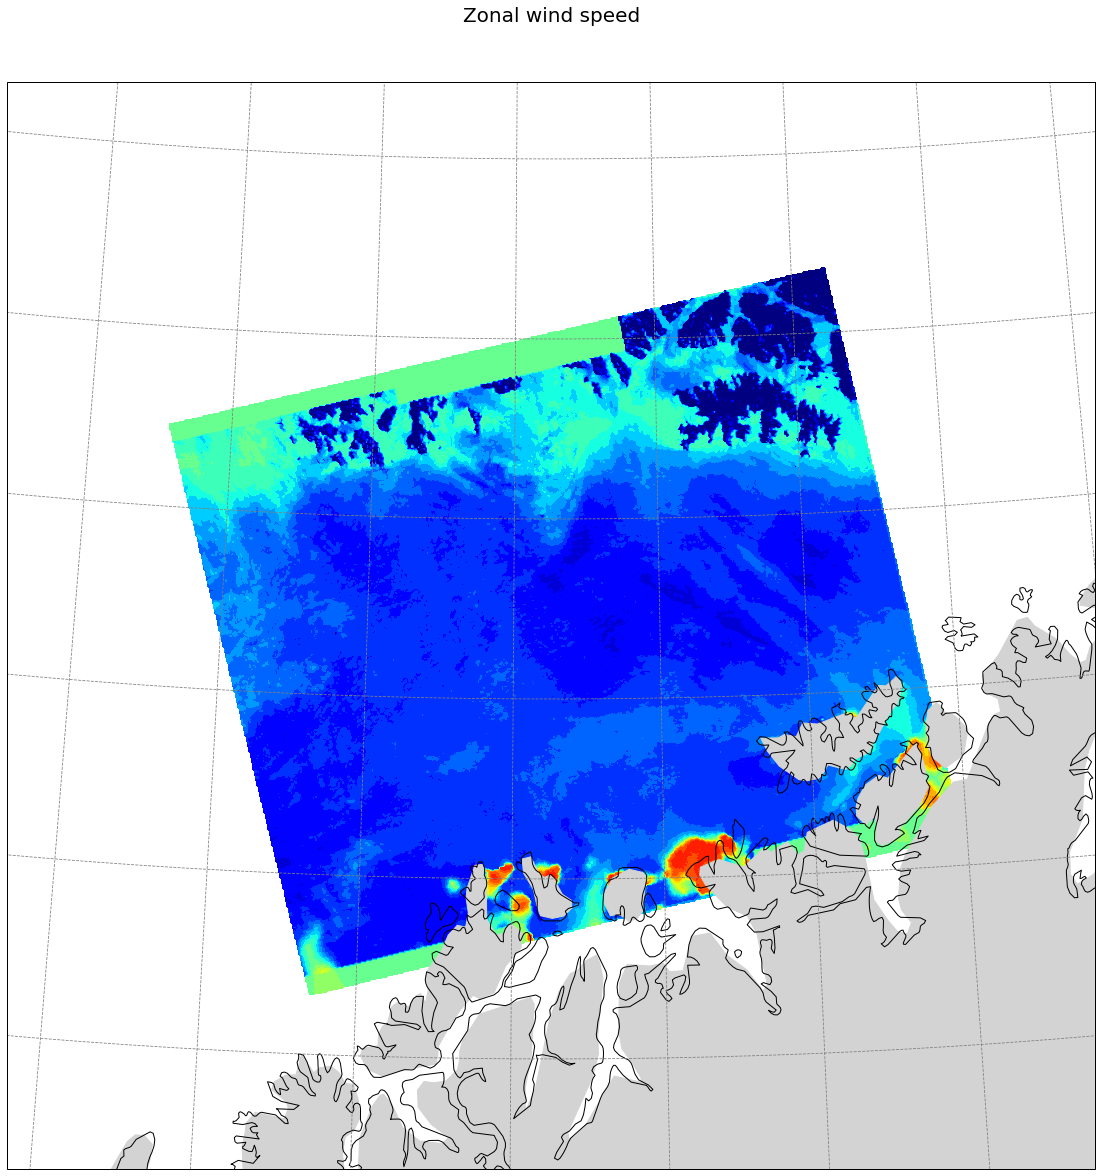

In [14]:
globe = ccrs.Globe(ellipse='WGS84', semimajor_axis=6378137, flattening=1/298.2572235604902)
proj = ccrs.Stereographic(central_longitude=np.mean(lon), central_latitude=np.mean(lat), globe=globe)
#proj = ccrs.Stereographic(central_longitude=15, central_latitude=80, globe=globe)

fig, axs = plt.subplots(1, 1, subplot_kw={'projection': proj}, figsize=(20, 20))
extent = [np.min(lon)-.5, np.max(lon)+.5, np.min(lat)-.5, np.max(lat)+.5]
land_f = cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='lightgray')

axs.set_extent(extent, crs=ccrs.PlateCarree())
axs.gridlines(color='gray', linestyle='--')
axs.add_feature(land_f)
axs.coastlines(resolution='10m')
axs.contourf(lon, lat, u, 40, vmin=-10, vmax=10, transform=ccrs.PlateCarree(), cmap='jet')
axs.set_title('Zonal wind speed', y=1.05, fontsize=20)

In [9]:
import folium
m = folium.Map()
folium.GeoJson(n.get_border_geojson()).add_to(m)
m

/home/vagrant/Miniconda3-4.6.14-Linux-x86_64/envs/py3openwind/lib/python3.6/site-packages/nansat/domain.py:592: UserWarning: > 180 deg correction to longitudes - disabled..
  warnings.warn("> 180 deg correction to longitudes - disabled..")
